In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

In [2]:
df['target'] = pd.factorize(df['target'])[0]


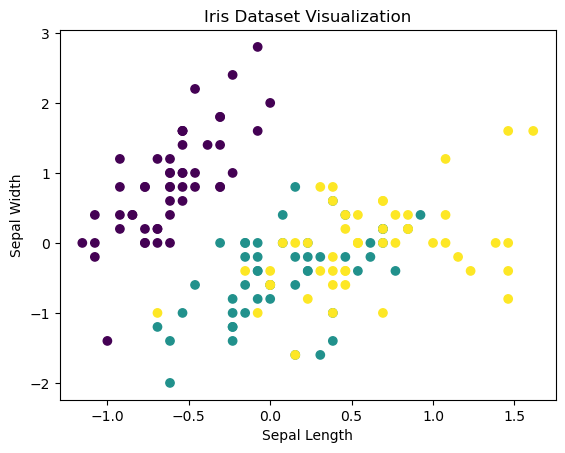

In [10]:
import matplotlib.pyplot as plt

# Visualizing the data
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset Visualization')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [5]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df[iris.feature_names] = robust_scaler.fit_transform(df[iris.feature_names])

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
SVM trained.


In [11]:
from sklearn.model_selection import cross_val_score

# Cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Cross-Validation Accuracy: 0.97 (+/- 0.02)
Decision Tree Cross-Validation Accuracy: 0.95 (+/- 0.03)
Random Forest Cross-Validation Accuracy: 0.96 (+/- 0.02)
SVM Cross-Validation Accuracy: 0.97 (+/- 0.02)


In [7]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Example for Random Forest
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5)
random_search.fit(X_train, y_train)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'n_estimators': [10, 50, 100]})

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

# Pipeline for Logistic Regression
pipeline_lr = Pipeline([
    ('preprocessor', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Pipeline for Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Ensemble model
ensemble_clf = VotingClassifier(estimators=[
    ('lr', pipeline_lr),
    ('rf', pipeline_rf)
], voting='hard')

ensemble_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('preprocessor',
                                               StandardScaler()),
                                              ('classifier',
                                               LogisticRegression())])),
                             ('rf',
                              Pipeline(steps=[('preprocessor',
                                               StandardScaler()),
                                              ('classifier',
                                               RandomForestClassifier())]))])

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Ensemble model with Random Forest
ensemble_rf = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble_rf.fit(X_train, y_train)

# Ensemble model with Gradient Boosting
ensemble_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
ensemble_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter optimization for Random Forest
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
nested_cv_rf = GridSearchCV(ensemble_rf, param_grid_rf, cv=5)
nested_cv_rf.fit(X_train, y_train)

# Hyperparameter optimization for Gradient Boosting
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
nested_cv_gb = GridSearchCV(ensemble_gb, param_grid_gb, cv=5)
nested_cv_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [100, 200]})

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Random Forest Performance:
              precision    recall  f1-score   support

           0       1.0

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


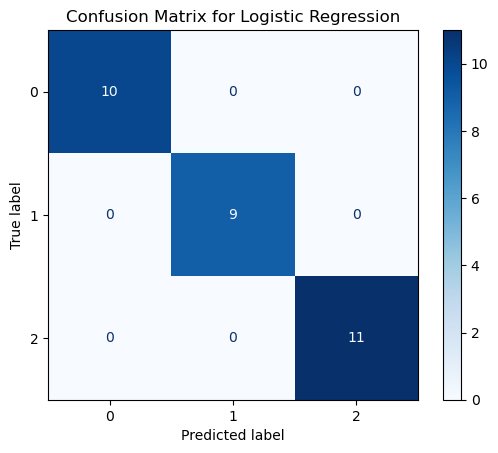

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


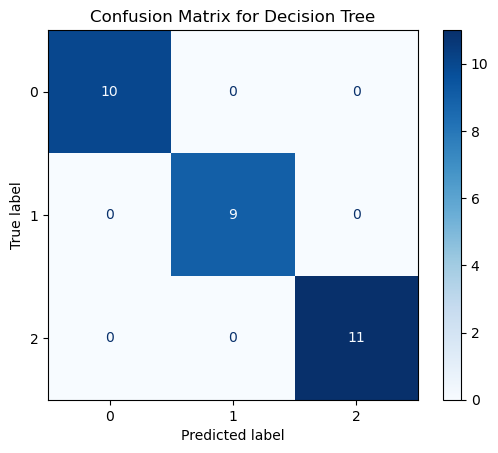

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


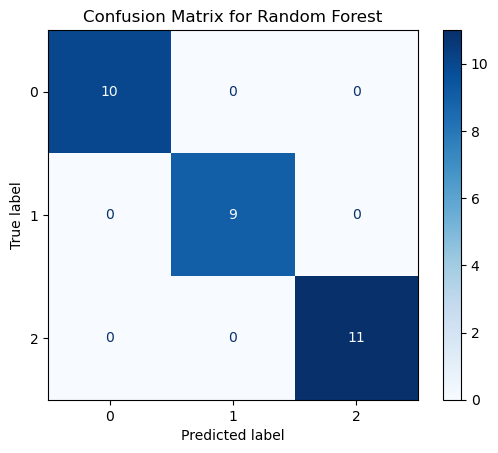

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


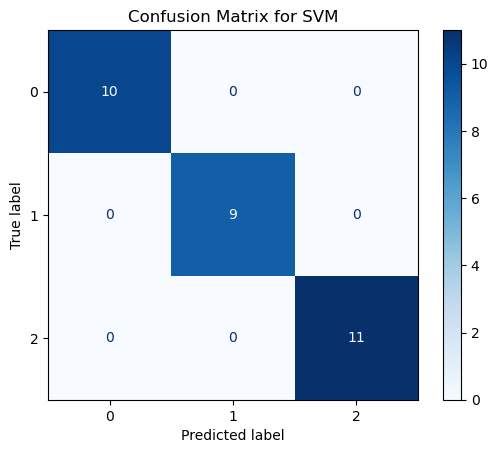

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Evaluation
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Visualization
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

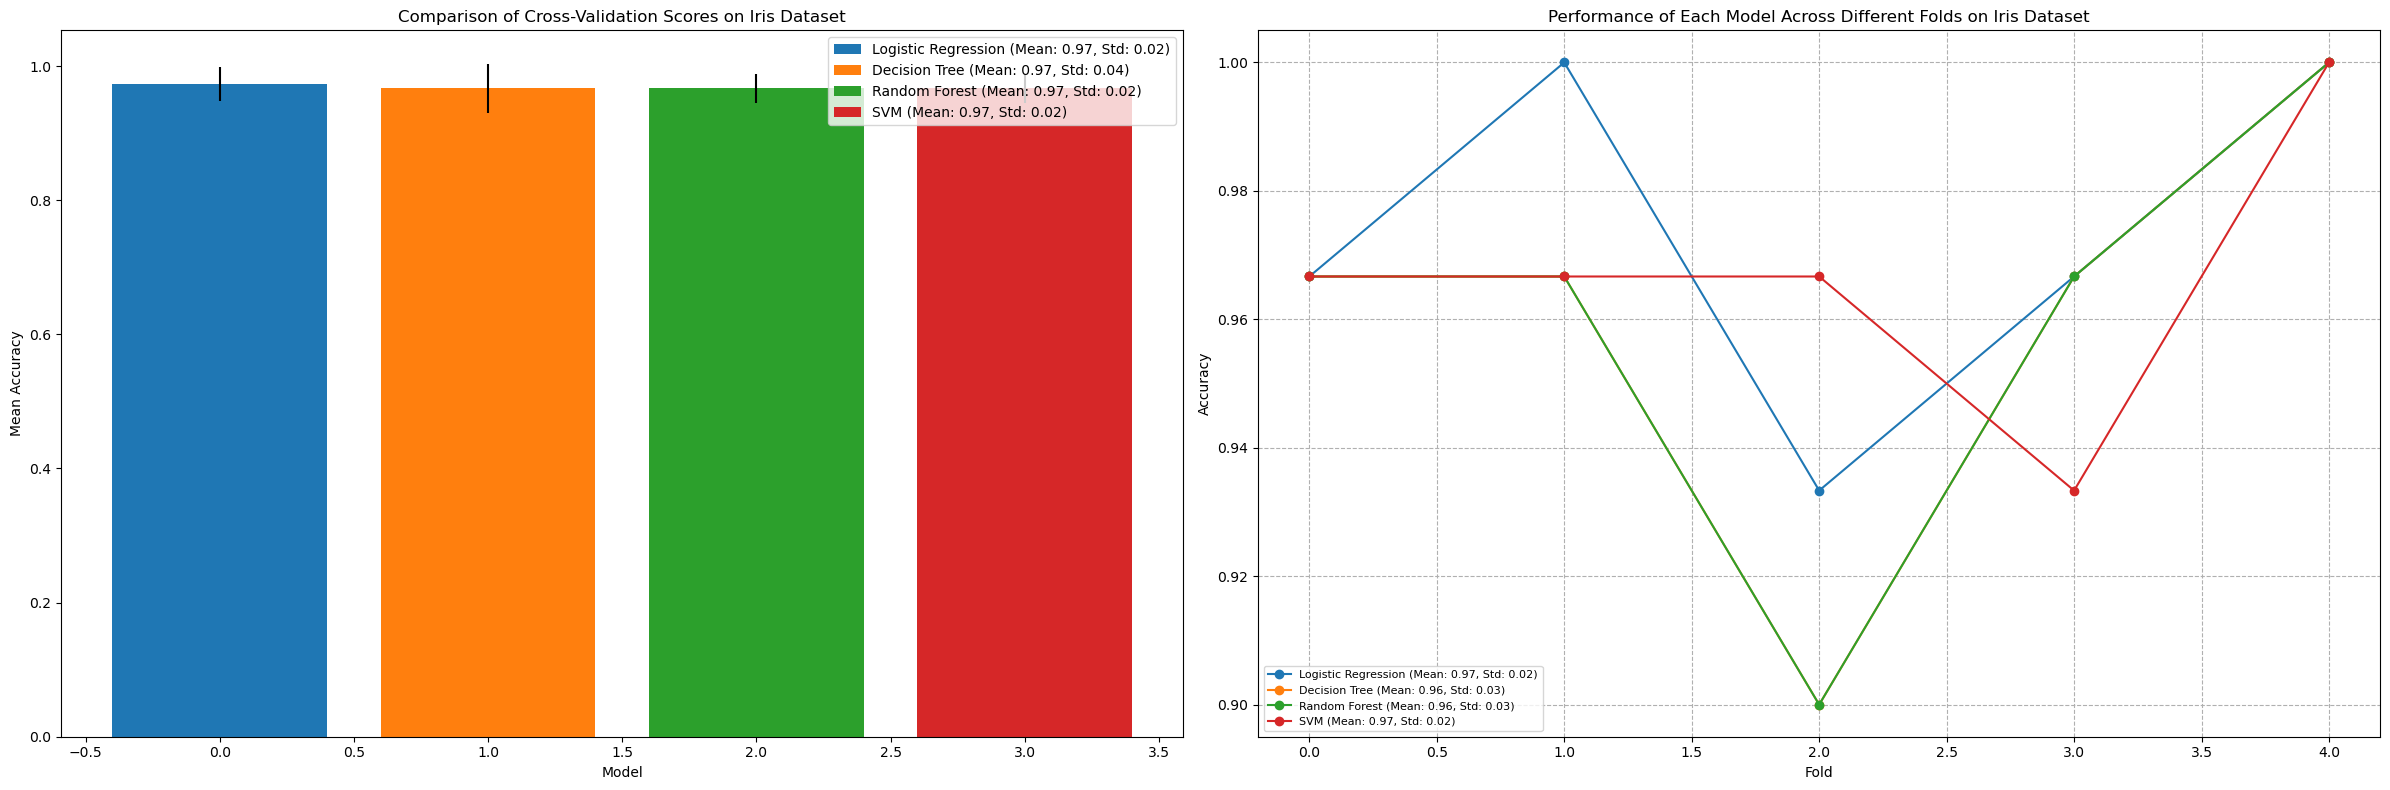

In [15]:
# Comparative analysis and visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[24, 8])

# Bar chart for mean cross-validation scores
for i, model in enumerate(models.values()):
    scores = cross_val_score(model, X, y, cv=5)
    ax1.bar(i, np.mean(scores), yerr=np.std(scores), label=f"{list(models.keys())[i]} (Mean: {np.mean(scores):.2f}, Std: {np.std(scores):.2f})")

ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Accuracy')
ax1.set_title('Comparison of Cross-Validation Scores on Iris Dataset')
ax1.legend()

# Line plot for performance across different folds
for i, model in enumerate(models.values()):
    scores = cross_val_score(model, X, y, cv=5)
    ax2.plot(scores, label=f"{list(models.keys())[i]} (Mean: {np.mean(scores):.2f}, Std: {np.std(scores):.2f})", marker='o')

ax2.set_xlabel('Fold')
ax2.set_ylabel('Accuracy')
ax2.set_title('Performance of Each Model Across Different Folds on Iris Dataset')
ax2.legend(loc='best', fontsize=8)
ax2.grid(True, linestyle='--')

plt.tight_layout()
plt.show()
